# Import lib

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
CNN_LSTM = os.path.join("result","trump_tweet_opinion_cnn_lstm.csv")
BERT = os.path.join("result","trump_tweet_opinion_bert.csv")
pd.set_option('display.max_colwidth', None)

# Import data

In [2]:
dataframe_cnn_lstm = pd.read_csv(CNN_LSTM)
dataframe_bert = pd.read_csv(BERT)

# Count negative and positive opinions for each models

In [3]:
tweets_opinion = dataframe_cnn_lstm[['Opinion_lstm', 'Opinion_cnn']]
tweets_opinion['Opinion_bert'] = dataframe_bert['Opinion_bert']

C:\Users\Imad Eddine Hajjane\AppData\Local\Temp\ipykernel_4220\3217327956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_opinion['Opinion_bert'] = dataframe_bert['Opinion_bert']


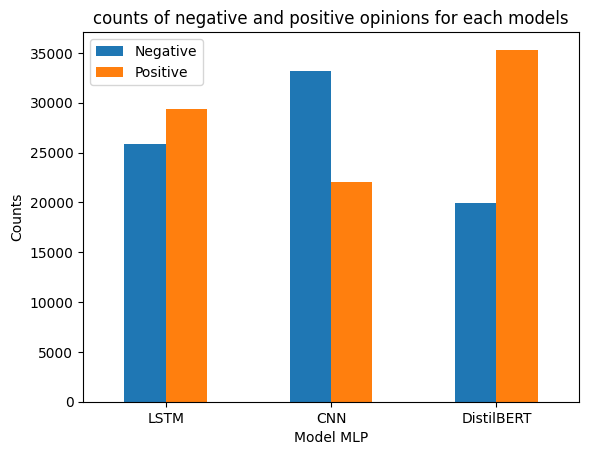

In [4]:
res_opinion = pd.DataFrame({"LSTM" : tweets_opinion.groupby("Opinion_lstm").size().tolist(),\
              "CNN": tweets_opinion.groupby("Opinion_cnn").size().tolist(),\
              "DistilBERT": tweets_opinion.groupby("Opinion_bert").size().tolist()}).T
res_opinion = res_opinion.rename(columns={0:"Negative", 1: "Positive"})
ax = res_opinion.plot(kind='bar', rot=0)
ax.set_xlabel('Model MLP')
ax.set_ylabel('Counts')
ax.set_title("counts of negative and positive opinions for each models")
plt.savefig(os.path.join("result", "counts_of_negative_and_positive_opinions_for_each_models.png"))

# Volting

In [8]:
def soft_volting(row):
    models_precisions = {"LSTM":0.796, "CNN":0.784 ,"DistilBERT":0.840}
    precision_values = list(models_precisions.values())
    row_average = np.average(row, weights=precision_values/np.sum(precision_values))
    return ("Positive" if row_average>=0.5 else "Negative")

In [9]:
tweets_opinion_binary =  tweets_opinion.replace(["Negative", "Positive"], [0, 1])

In [10]:
opinion_volting = pd.DataFrame(dataframe_bert[["id","text"]].copy())
opinion_volting["Opinion"] =tweets_opinion_binary.apply(lambda row: soft_volting(row), axis=1)
opinion_volting

,id,text,Opinion
0,98454970654916608,Republicans and Democrats have both created our economic problems.,Negative
1,1234653427789070336,"I was thrilled to be back in the Great city of Charlotte, North Carolina with thousands of hardworking American Patriots who love our Country, cherish our values, respect our laws, and always put AMERICA FIRST! Thank you for a wonderful evening!! #KAG2020 https://t.co/dNJZfRsl9y",Positive
2,1218010753434820614,RT @CBS_Herridge: READ: Letter to surveillance court obtained by CBS News questions where there will be further disciplinary action and cho…,Negative
3,1304875170860015617,"The Unsolicited Mail In Ballot Scam is a major threat to our Democracy, &amp; the Democrats know it. Almost all recent elections using this system, even though much smaller &amp; with far fewer Ballots to count, have ended up being a disaster. Large numbers of missing Ballots &amp; Fraud!",Negative
4,1218159531554897920,RT @MZHemingway: Very friendly telling of events here about Comey's apparent leaking to compliant media. If you read those articles and tho…,Negative
...,...,...,...
55237,1319485303363571714,RT @RandPaul: I don’t know why @JoeBiden thinks he can continue to lie about this. \n\nHe wants to ban fracking and end all fossil fuels like…,Negative
55238,1319484210101379072,RT @EliseStefanik: President @realDonaldTrump excels at communicating directly to the American people. \n\nJoe Biden communicates to the DC B…,Negative
55239,1319444420861829121,RT @TeamTrump: LIVE: Presidential Debate #Debates2020\n\nText VOTE to 88022 https://t.co/UeQOquVxR2,Negative
55240,1319384118849949702,Just signed an order to support the workers of Delphi Corporation and make sure that we protect the pensions of all American workers! Obama-Biden FAILED American workers and FAILED the workers of Delphi. I ALWAYS put American workers FIRST!,Positive


In [11]:
opinion_volting.to_csv(os.path.join("..", "result", "Trump_tweet_opinion_analytics_with_volting.csv"), index=False)
opinion_volting.to_csv(os.path.join("result", "Trump_tweet_opinion_analytics_with_volting.csv"), index=False)

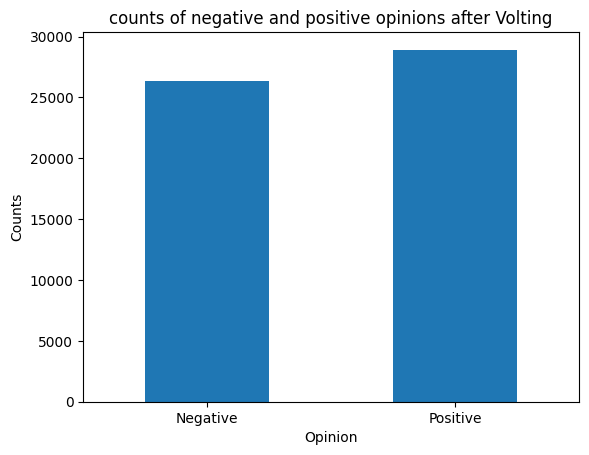

In [12]:
ax = opinion_volting.groupby("Opinion").size().plot(kind="bar", rot=0)
ax.set_xlabel('Opinion')
ax.set_ylabel('Counts')
ax.set_title("counts of negative and positive opinions after Volting")
plt.savefig(os.path.join("result", "counts_of_negative_and_positive_opinions_after_volting.png"))